# Introduction

The data that I will be working with was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang and downloaded from Kaggle.com. It represents sixteen years of data for 193 countries from 2000 to 2015. 

I will be attempting to model the Life Expectancy variable using all other variables in the data. 

The variable descriptions are as follows:

**Country** - Country

**Year** - Year

**Status** - Developed or Developing status

**Lifeexpectancy** - Life Expectancy in age

**AdultMortality** - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

**infantdeaths** - Number of Infant Deaths per 1000 population

**Alcohol** - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**percentageexpenditure** - Expenditure on health as a percentage of Gross Domestic Product per capita(%)

**HepatitisB** - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

**Measles** - Measles - number of reported cases per 1000 population

**BMI** - Average Body Mass Index of entire population

**under-fivedeaths** - Number of under-five deaths per 1000 population

**Polio** - Polio (Pol3) immunization coverage among 1-year-olds (%)

**Totalexpenditure** - General government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria** - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

**HIV/AIDS** - Deaths per 1 000 live births HIV/AIDS (0-4 years)

**GDP** - Gross Domestic Product per capita (in USD)

**Population** - Population of the country

**thinness1-19years** - Prevalence of thinness among children and adolescents for Age 10 to 19 (%)

**thinness5-9years** - Prevalence of thinness among children for Age 5 to 9(%)

**Incomecompositionofresources** - Human Development Index in terms of income composition of resources (index ranging from 0 to 1). You can read more on the HDI here http://hdr.undp.org/en/content/human-development-index-hdi 

**Schooling** - Number of years of Schooling(years)

## Research Question

The value of modeling Life Expectancy with these variables lies in my attempt to answer this question: ***Which of these variables most impacts Life Expectancy?*** If we can understand better what most leads to increases in Life Expectancy, nations and organizations such as the UN and WHO can focus on improving those variables.

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('led.csv')

# Data Exploration and Cleaning

I will perform some basic exploration on the data to discover its shape, what type of objects we have for variables, and look for missing data.

In [3]:
df.shape

(2938, 22)

In [4]:
df.head(10)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                         2938 non-null object
Year                            2938 non-null int64
Status                          2938 non-null object
Lifeexpectancy                  2928 non-null float64
AdultMortality                  2928 non-null float64
infantdeaths                    2938 non-null int64
Alcohol                         2744 non-null float64
percentageexpenditure           2938 non-null float64
HepatitisB                      2385 non-null float64
Measles                         2938 non-null int64
BMI                             2904 non-null float64
under-fivedeaths                2938 non-null int64
Polio                           2919 non-null float64
Totalexpenditure                2712 non-null float64
Diphtheria                      2919 non-null float64
HIV/AIDS                        2938 non-null float64
GDP                             2490 no

Two variables are objects—Country and Status. I will investigate these two variables to understand them and search for anamolies.

In [6]:
df['Country'].nunique()

193

In [7]:
df['Country'].value_counts().describe()

count    193.000000
mean      15.222798
std        3.333401
min        1.000000
25%       16.000000
50%       16.000000
75%       16.000000
max       16.000000
Name: Country, dtype: float64

The years present in the data range from 2000 to 2015, or a 16 year window. The value counts are consistent with this—most countries have 16 years of data. It appears some did not have all of those years of data, which is something to check out.

In [8]:
df['Country'].value_counts().value_counts()

16    183
1      10
Name: Country, dtype: int64

So 183 of the 193 countries had all 16 years of data, but 10 countries only had 1 year of data available. This is possibly due to countries being redefined in some way during the time period we are looking at. Let's see what those countries are.

In [9]:
df['Country'].value_counts(ascending=True).head(10)

Monaco                1
Palau                 1
CookIslands           1
MarshallIslands       1
Nauru                 1
Tuvalu                1
Niue                  1
SaintKittsandNevis    1
SanMarino             1
Dominica              1
Name: Country, dtype: int64

For now, I am not going to worry about these. They will represent a small enough portion of the data that I am not worried about the bias. 

In [10]:
df['Status'].nunique()

2

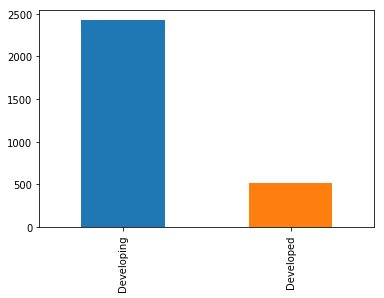

In [11]:
df['Status'].value_counts().plot(kind='bar')

In [12]:
df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [13]:
df.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [14]:
# Check for missing data
display(df.isnull().any())

Country                         False
Year                            False
Status                          False
Lifeexpectancy                   True
AdultMortality                   True
infantdeaths                    False
Alcohol                          True
percentageexpenditure           False
HepatitisB                       True
Measles                         False
BMI                              True
under-fivedeaths                False
Polio                            True
Totalexpenditure                 True
Diphtheria                       True
HIV/AIDS                        False
GDP                              True
Population                       True
thinness1-19years                True
thinness5-9years                 True
Incomecompositionofresources     True
Schooling                        True
dtype: bool

There are quite a few columns with missing data. Let's drop the rows with missing data and check our data descriptors again.

In [15]:
df = df.dropna()

In [16]:
df.shape

(1649, 22)

In [17]:
df.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


By even just looking at Life Expectancy, we can see that simply dropping NaN values loses a too large amount of variance. Nearly half of the rows were eliminated. We must find a different route to deal with missingness.

In [18]:
# Reset df to original
df = pd.read_csv('led.csv')

What are the exact numbers of missing data we are working with?

In [19]:
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

Population, GDP, and Hepatitis B are such massive numbers that my project would be best served by dropping those columns and focusing my prediction analysis on other variables.

In [20]:
df = df.drop(columns=['HepatitisB', 'GDP', 'Population'])

df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


I am going to have the remaining NaN values replaced with the padding strategy. This makes sense since the rows for almost every nation are grouped together in years ranging from 2015 to 2000. So if a year is missing, I will forward fill (aka pad) it with the next year of the theoretically same nation. I will limit this to only 3 consecutive NaN values so that if every year of a nation is missing a certain variable data, every year won't be filled with the wrong nation's data.

In [21]:
df = df.fillna(method='ffill', limit=3)

# Now check for how many NaN's remain
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                    0
AdultMortality                    0
infantdeaths                      0
Alcohol                          14
percentageexpenditure             0
Measles                           0
BMI                              26
under-fivedeaths                  0
Polio                            11
Totalexpenditure                 39
Diphtheria                       11
HIV/AIDS                          0
thinness1-19years                26
thinness5-9years                 26
Incomecompositionofresources    145
Schooling                       145
dtype: int64

I will now replace the remaining NaN's with the mean of the variable.

In [22]:
for col in df:
    if df[col].isnull().values.any() == True:
        avg = np.mean(df[col])
        df[col].fillna(value=avg, inplace=True)

In [23]:
df.isnull().sum()

Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

Perfect! Here we have a dataframe with missingness fully resolved. 

I'm going to next recode the Status variable to an integer variable, with 0 representing Developing and 1 representing Developed.

In [24]:
df.Status = np.where(df.Status=='Developing', 0, 1)

In [25]:
df.describe()

,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.195643,164.816542,30.303948,4.594378,738.251295,2419.592240,38.278365,42.035739,82.427400,5.921100,82.207721,1.742103,4.859135,4.892754,0.626842,11.974364
std,4.613841,0.379405,9.536654,124.433748,117.926501,4.040490,1987.914858,11467.272489,19.983549,160.445548,23.504564,2.475762,23.776923,5.077785,4.424007,4.520061,0.206450,3.285603
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.025000,74.000000,0.000000,0.880000,4.685343,0.000000,19.325000,0.000000,78.000000,4.280000,78.000000,0.100000,1.600000,1.600000,0.501000,10.200000
50%,2008.000000,0.000000,72.000000,144.000000,3.000000,3.765000,64.912906,17.000000,43.000000,4.000000,93.000000,5.780000,93.000000,0.100000,3.400000,3.400000,0.664000,12.100000
75%,2012.000000,0.000000,75.600000,228.000000,22.000000,7.665000,441.534144,360.250000,56.100000,28.000000,97.000000,7.440000,97.000000,0.800000,7.200000,7.200000,0.774000,14.100000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,27.700000,28.600000,0.948000,20.700000


Let's start with a  simple correlation matrix.

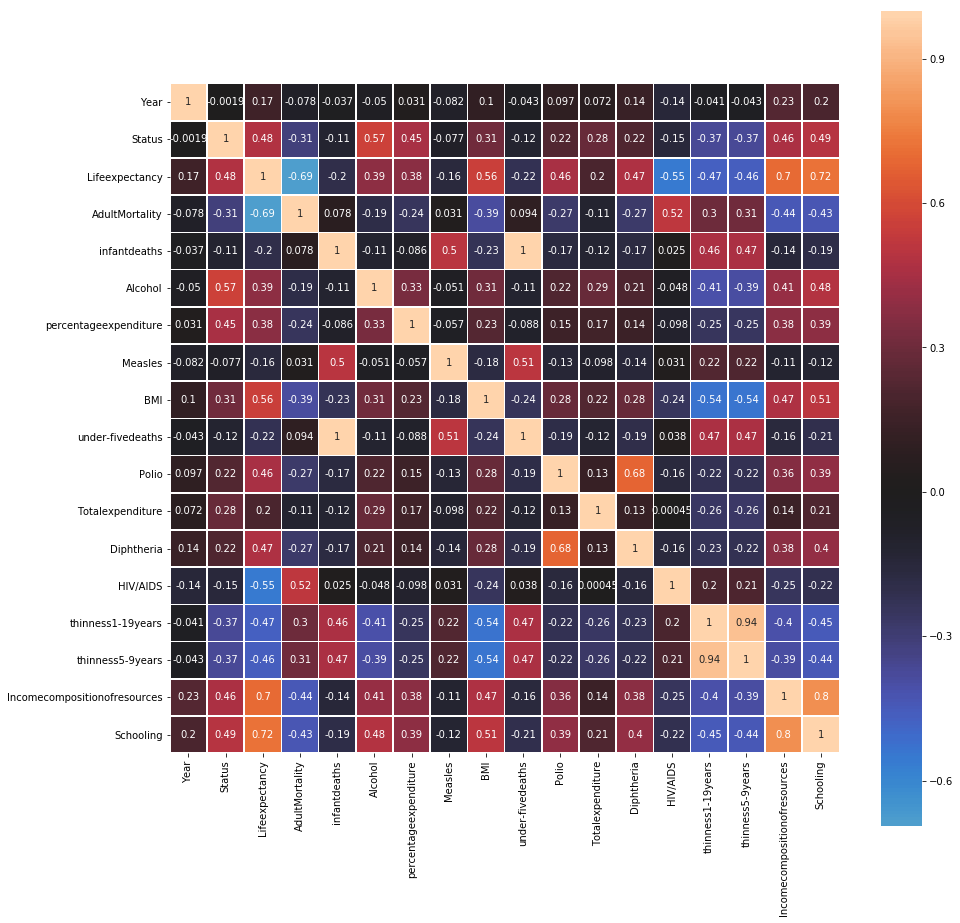

In [26]:
corrmat = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corrmat, center=0, annot=True, square=True, linewidths=0.5)

Let's check out how all of these variables plot against each other as well

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


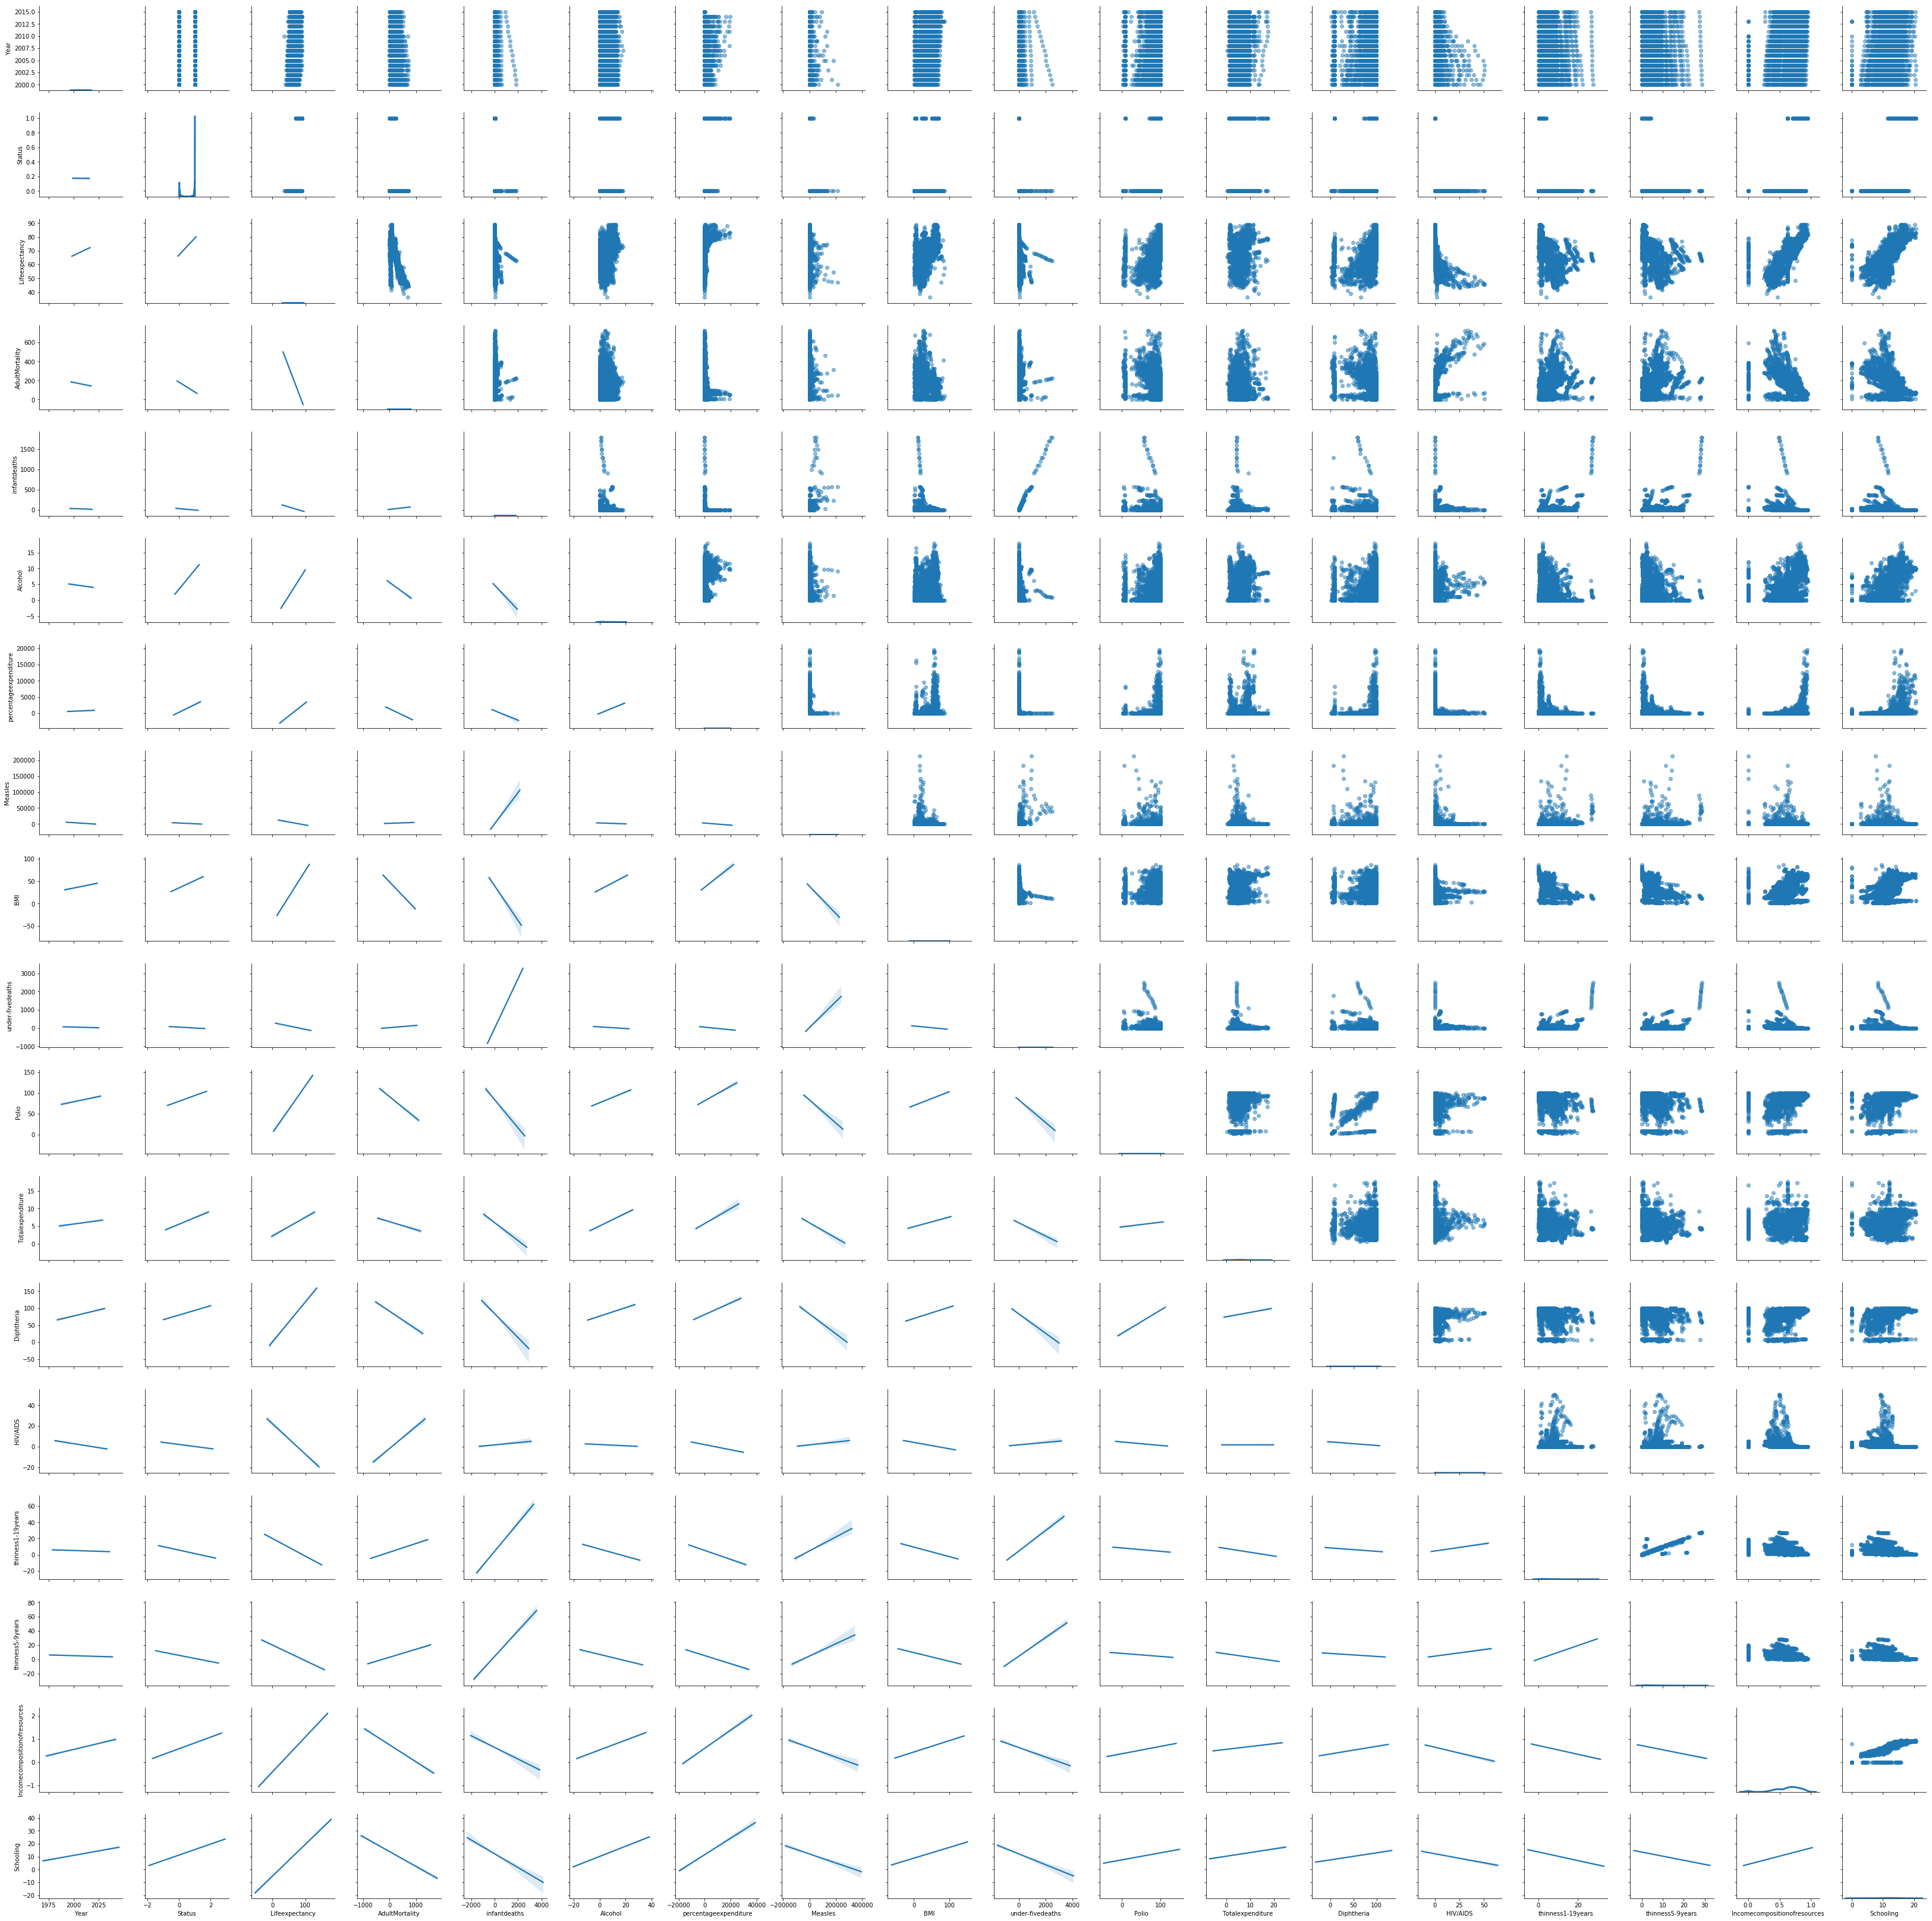

In [27]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter, alpha=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)

That visual is just too massive to be able to interpret too much. Let's look at some visuals more closely, starting with a kde plot of all of my continuous variables individually.

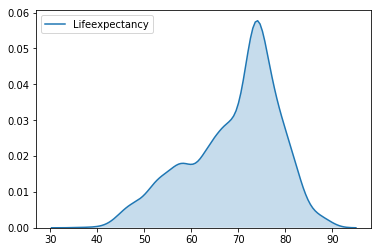

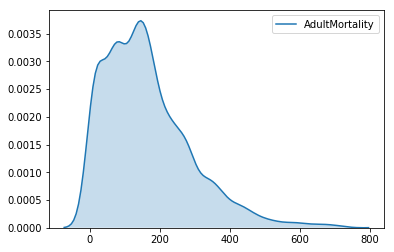

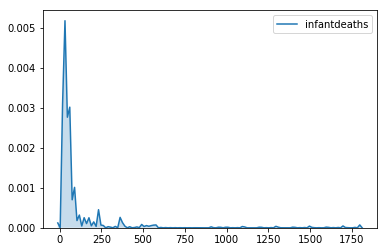

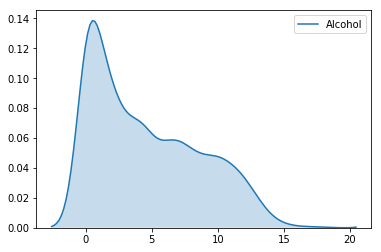

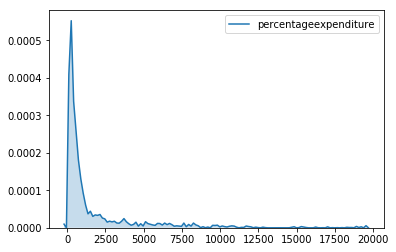

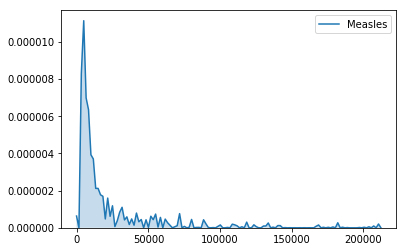

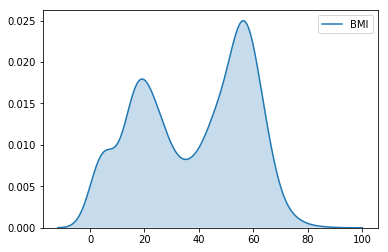

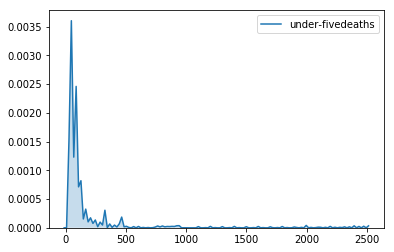

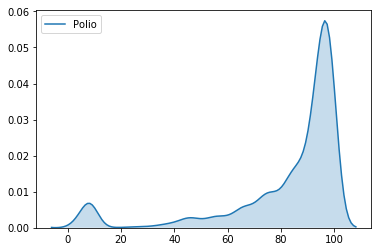

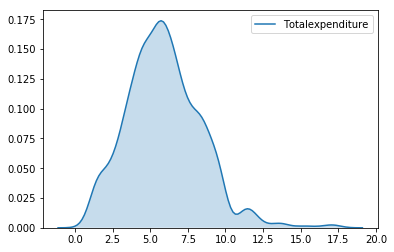

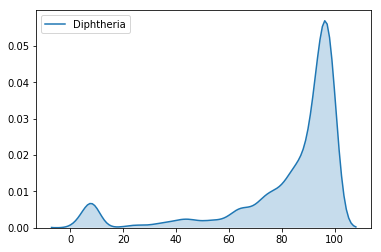

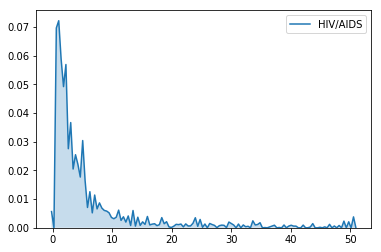

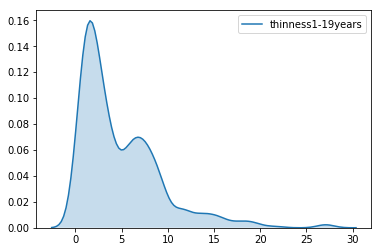

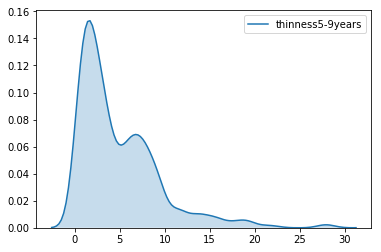

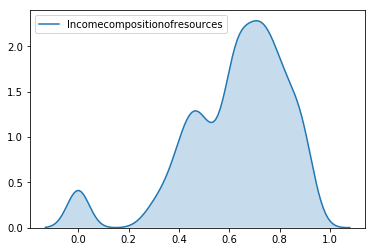

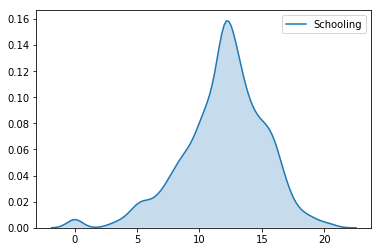

In [28]:
# Remove non-continuous variables
df_kde = df.drop(columns=['Country', 'Year', 'Status'])

for col in df_kde:
    sns.kdeplot(df[col], shade=True)
    plt.show()
    plt.close()

I will plot every single continuous variable I have against Life Expectancy to check on its relationship.

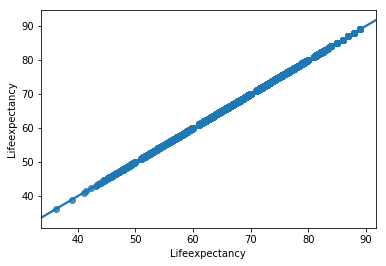

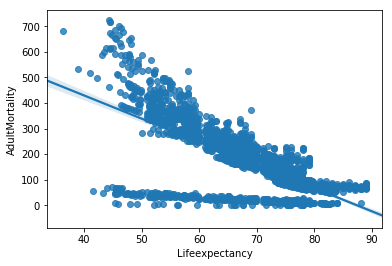

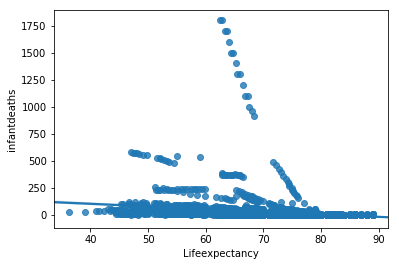

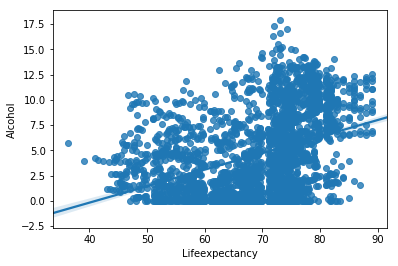

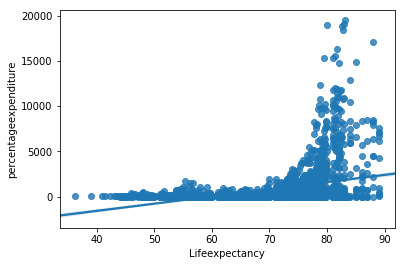

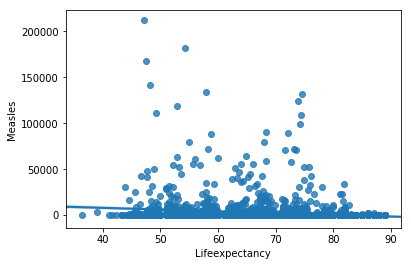

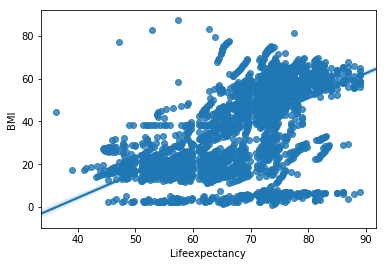

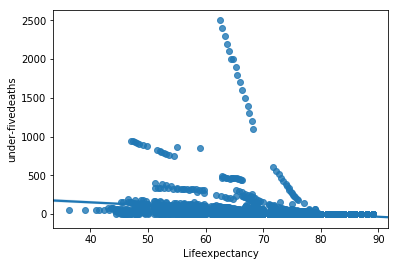

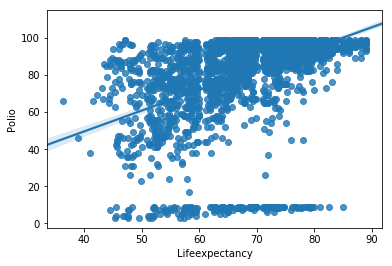

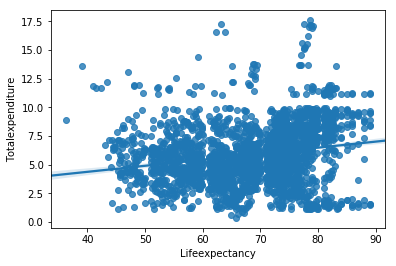

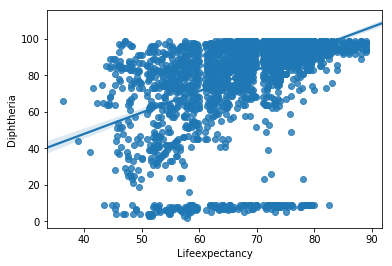

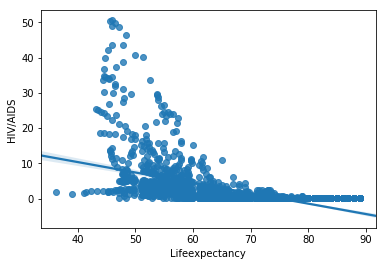

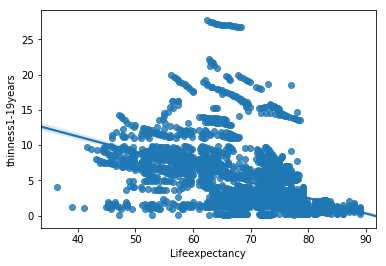

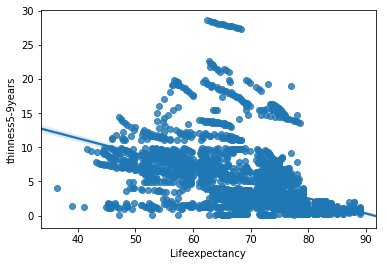

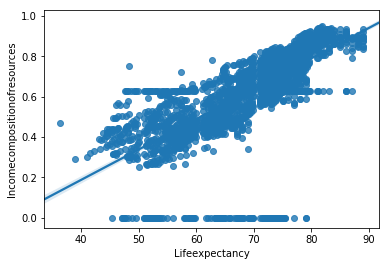

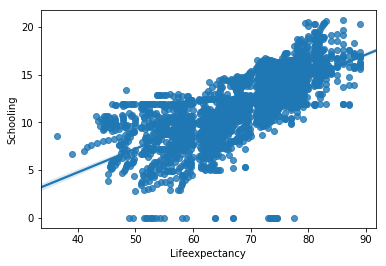

In [29]:
for col in df_kde:
    sns.regplot(x='Lifeexpectancy', y=col, data=df_kde)
    plt.show()
    plt.close()

Let's do another plot set like the previous, but break it down by the developing/developed status. Reminder that 0 represents developing, 1 represents developed.

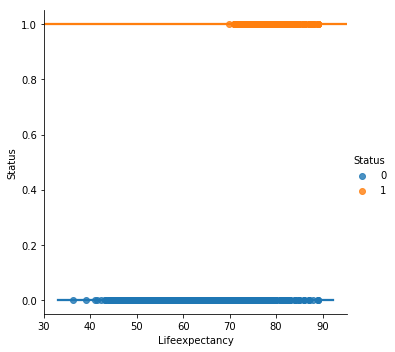

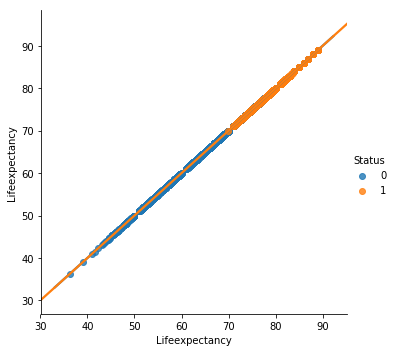

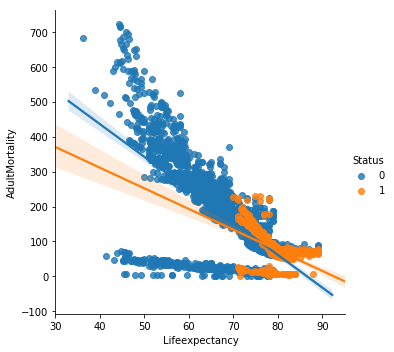

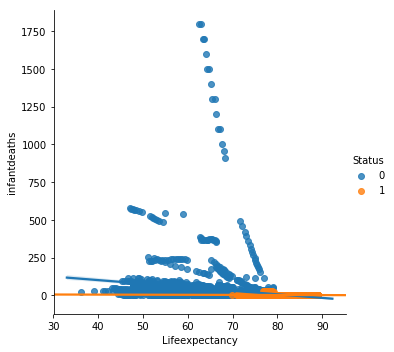

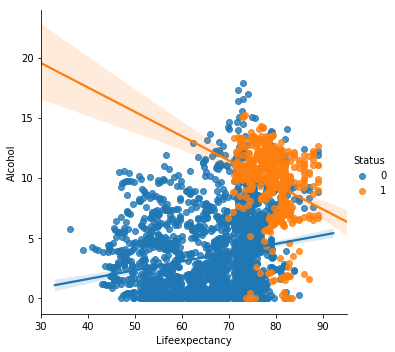

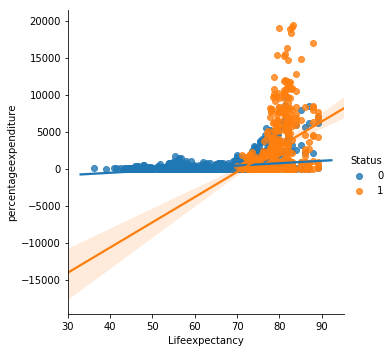

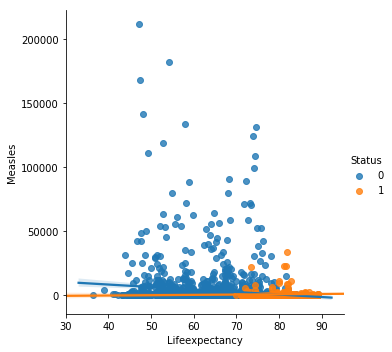

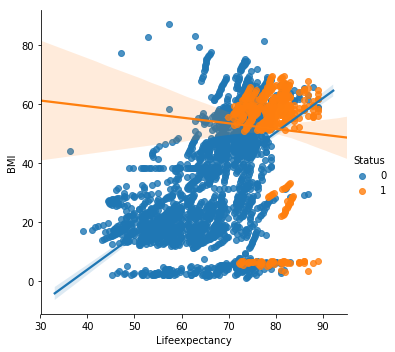

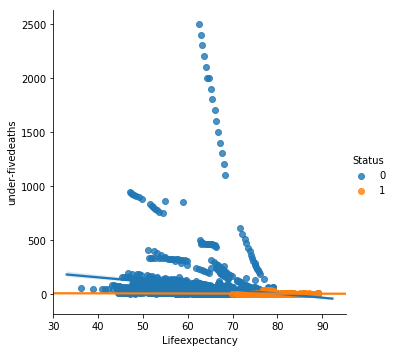

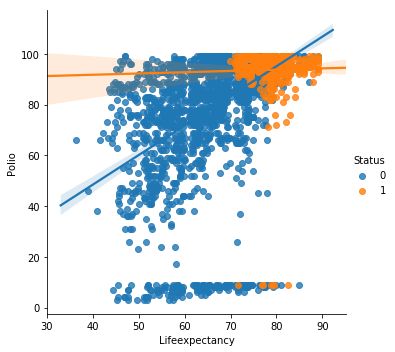

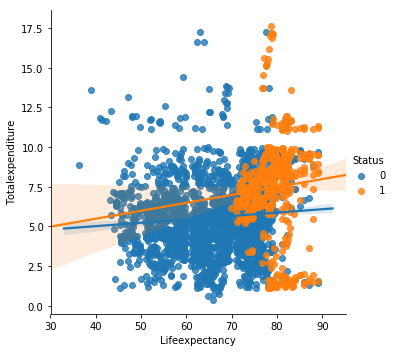

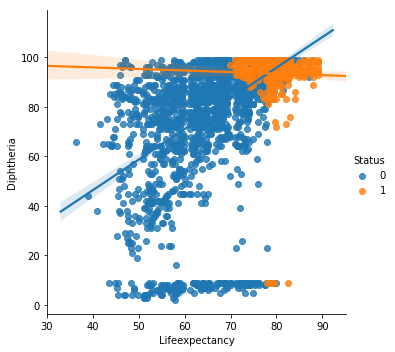

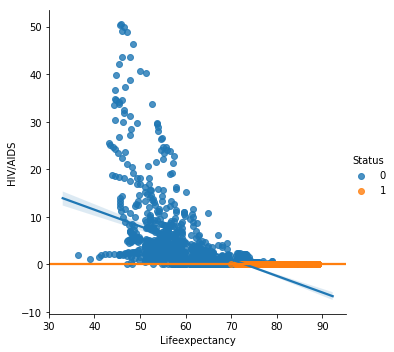

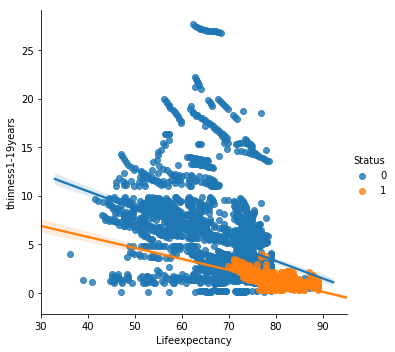

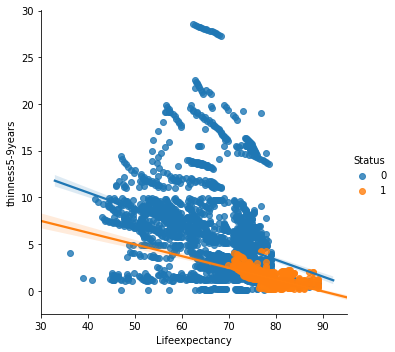

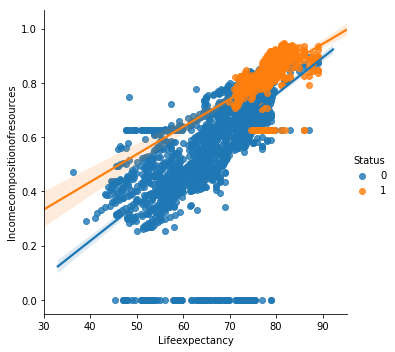

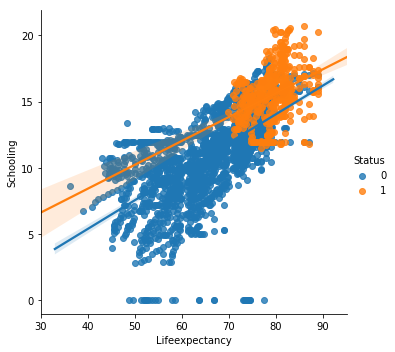

In [30]:
df_lmplot = df.drop(columns=['Country', 'Year'])

for col in df_lmplot:
    sns.lmplot(x='Lifeexpectancy', y=col, data=df_lmplot, hue='Status')
    plt.show()
    plt.close()

Several interesting differences between developed and developing countries are apparent now. For developing countries, alcohol consumption per capita has an overall positive correlation with life expectancy, but in developed countries alcohol consumption has a negative correlation.

Another major differene is BMI, which has a negative correlation with life expectency in developed countries but a positive correlation with life expectancy in developing countries. 

The kde plots of variable distribution that I ran made me concerned about outliers. I am going to create box plots for each variable that are broken down by Status. This way I can look for outliers again, and compare the two types of Status by their distributions.

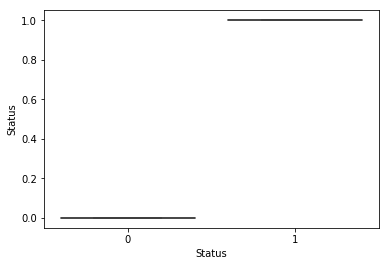

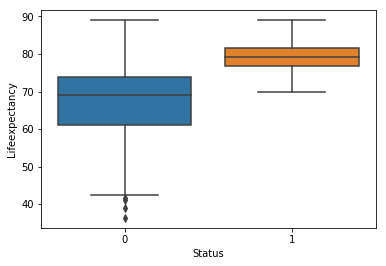

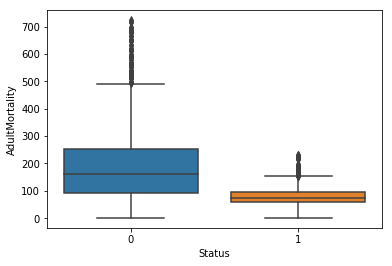

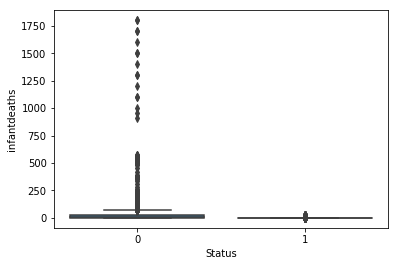

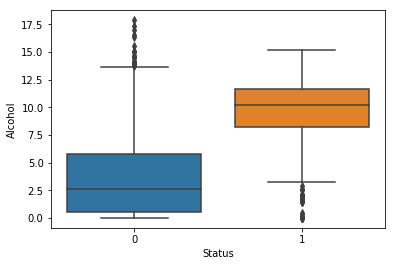

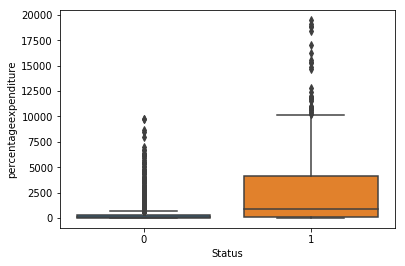

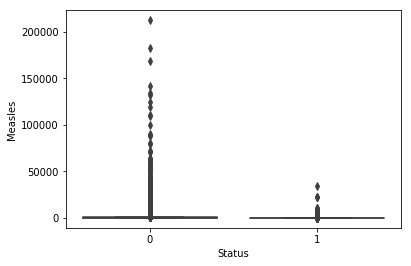

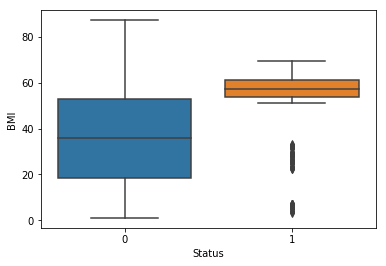

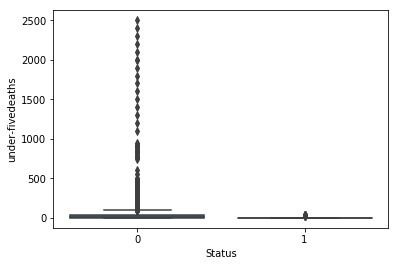

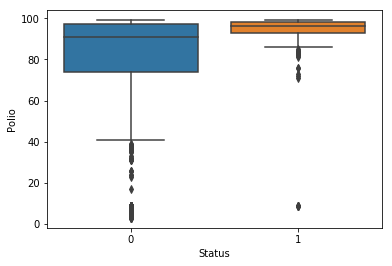

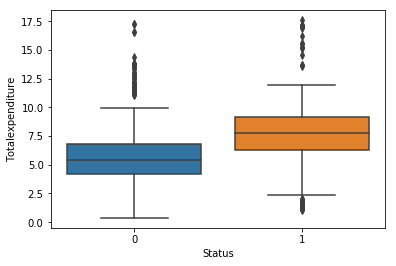

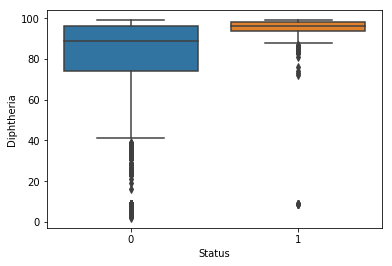

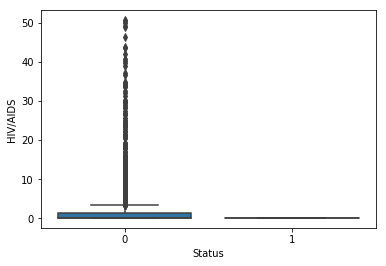

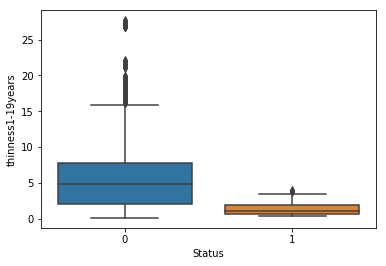

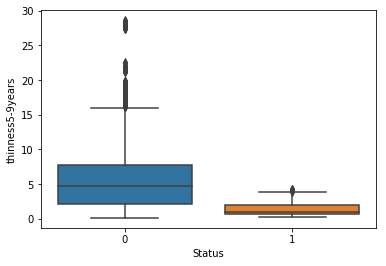

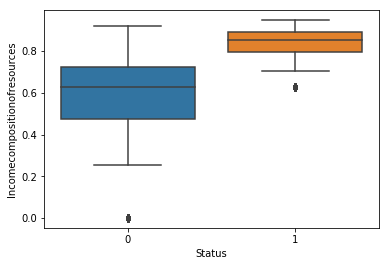

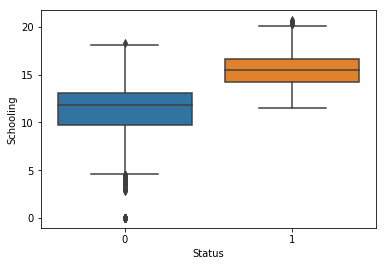

In [31]:
for col in df_lmplot:
    sns.boxplot(x='Status', y=col, data=df_lmplot)
    plt.show()
    plt.close()

There are some potential problems with outliers in a handful of the variables in the developing nation category. This is something to keep an eye on if I encounter any problems. I will create my models with the outliers still in place first and check for performance. I do not want to remove the outliers due my fear of bias entering the model by removing outliers that are real data and then under-representing any nations or regions. If the models are not satisfactory in performance, I will remove outliers based on the IQR.

# Feature Engineering and Selection

I already performed some feature engineering by transforming the Status variable to an integer variable that I can work with. I am going to perform normalization since the variables have very different ranges. Then I will perform several versions of selection- Recursive Feature Elimination with Cross Validation and Feature Importance Selection. I will check each version for performance with my models, Gradient Boosting Regression and Random Forest Regression. 

In [45]:
from sklearn.preprocessing import StandardScaler

# Remove unwanted variables (Country and Year), outcome variable (Life expectancy), and Status (Categorical variable)
X = df.drop(columns=['Country', 'Year', 'Status', 'Lifeexpectancy'])

# Perform Normalization
names = X.columns
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=names)

# Now reinsert my categorical variable, Status, after normalization of continuous variables
X['Status'] = df['Status']

# Create outcome variable
y = df['Lifeexpectancy']

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

model1 = GradientBoostingRegressor(n_estimators=1000)
model2 = RandomForestRegressor(n_estimators=1000, max_depth=4)

selector1 = RFECV(model1, step=1, cv=5)
selector2 = RFECV(model2, step=1, cv=5)

selector1.fit(X, y)
selector1.support_

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False])

In [47]:
selector1.ranking_

array([ 1,  8,  7, 12, 13,  6,  2, 11,  9,  5,  1, 10,  4,  1,  3, 14])

In [48]:
X.head()

,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Status
0,0.789176,0.268824,-1.134803,-0.335570,-0.110384,-0.959871,0.255359,-3.252152,0.904481,-0.723838,-0.323445,2.789997,2.745396,-0.716234,-0.570575,0
1,0.853479,0.285786,-1.134803,-0.334441,-0.168124,-0.984896,0.274060,-1.039439,0.912561,-0.850033,-0.323445,2.857821,2.789651,-0.730768,-0.601016,0
2,0.829365,0.302749,-1.134803,-0.334594,-0.173531,-1.009921,0.292761,-0.869230,0.892362,-0.765903,-0.323445,2.903036,2.833906,-0.759836,-0.631457,0
3,0.861516,0.328193,-1.134803,-0.332096,0.032045,-1.034946,0.317696,-0.656469,1.049916,-0.639709,-0.323445,2.948252,2.900288,-0.793748,-0.661898,0
4,0.885630,0.345155,-1.134803,-0.367862,0.051757,-1.054965,0.342631,-0.613917,0.787326,-0.597644,-0.323445,3.016075,2.944543,-0.837349,-0.753221,0


Based on the RFECV selection method informed by Gradient Boosting Regression, the top 3 variables for Life Expectancy are Adult Mortality, Income Composition of Resources, and HIV/AIDS. This is followed closely by Under-Five Deaths, Schooling, thinness in children ages 5-9, and Diptheria vaccination. It makes sense that Life Expectancy would be highly correlated to adult mortality and under-five deaths- those are measuring how many and at what age people die. 

More interesting to me are the other features that score well. What this dataset called the Income Composition of Resources is more often known as the Human Development Index, a composite score of a nation's education levels, income per capita, and life expectancy. HIV/AIDS deaths per 1000 live births in children ages 0-4 is also highly predictive. Following closely are the average years of schooling and the prevalance of thinness in children ages 5-9, a stand-in for childhood nutrition. Last, we have the vaccination rates for the DTP3 vaccine among 1-year olds, which covers Diptheria, Tetanus, and Pertussis.

Based on these findings thus far, the modeled data is pointing towards education, national income levels, HIV/AIDS prevention, childhood nutrition, and DTP3 vaccination in infants as the issues that can most effectively be focused on to increase life expectancy.

Let's continue our work on feature selection and ultimately model creation before we make any final analysis.

In [49]:
selector2.fit(X, y)
selector2.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3])

It seems that this model likes almost all of the features equally. We don't learn much from this, so we will move on to feature importance measures that the models create.

In [51]:
# GradientBoostingRegressor feature importance
model1.fit(X, y)
print(model1.feature_importances_)

[0.15231253 0.01054356 0.01041054 0.00351599 0.00143556 0.01288117
 0.01736088 0.0045734  0.0041713  0.0151569  0.46323067 0.00583529
 0.0150505  0.26648516 0.01612323 0.00091332]


In [52]:
# RandomForestRegressor feaure importance
model2.fit(X, y)
print(model2.feature_importances_)

[1.30732871e-01 1.48301451e-03 3.93253956e-04 3.55801556e-04
 8.62601231e-04 7.35120298e-03 1.02021132e-02 3.11890597e-04
 6.46009637e-05 2.44757503e-04 6.59622894e-01 1.45329714e-03
 2.05503649e-03 1.69280960e-01 1.55857048e-02 0.00000000e+00]


Both models' feature importance suggest 3 features to be most important in the same order: HIV/AIDS deaths, the Income Composition of Resources (aka Human Development Index) metric, and Adult Mortality. This lines up with what we learned from RFECV analysis. The same group of four form a block of next up in terms of importance: Schooling, Childhood thinness, Diptheria Vaccination, and Under-Five Deaths.

Based on these findings, these are the 7 features that I will select.

# Model Tuning and Selection

In [118]:
features = X.drop(columns=['infantdeaths', 'Alcohol', 'percentageexpenditure', 'Measles', 'BMI',
                 'Polio', 'Totalexpenditure', 'thinness1-19years', 'Status'])

from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(n_estimators=1000)

cross_val_score(gbr, features, y, cv=5)

array([0.93213232, 0.87650378, 0.91526504, 0.90111805, 0.92055845])

In [60]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01)

cross_val_score(gbr, features, y, cv=5)

array([0.93859762, 0.87594718, 0.92189735, 0.8966389 , 0.90700432])

In [57]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=2)

cross_val_score(rfr, features, y, cv=5)

array([0.81241759, 0.66214973, 0.74991378, 0.71343709, 0.71567435])

In [58]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=4)

cross_val_score(rfr, features, y, cv=5)

array([0.90202319, 0.8109487 , 0.89253586, 0.83697349, 0.84829073])

In [109]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=1000, max_depth=2)

cross_val_score(etr, features, y, cv=5)

array([0.73490348, 0.75555803, 0.7516666 , 0.7177949 , 0.71323723])

In [110]:
etr = ExtraTreesRegressor(n_estimators=1000, max_depth=4)

cross_val_score(etr, features, y, cv=5)

array([0.87367603, 0.86961558, 0.87772326, 0.83960322, 0.85107285])

In [62]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor(n_estimators=1000)

cross_val_score(br, features, y, cv=5)

array([0.94186593, 0.88800419, 0.91632254, 0.902097  , 0.91951822])

In [68]:
from sklearn.svm import LinearSVR

svr = LinearSVR()

cross_val_score(svr, features, y, cv=5)

array([0.77289401, 0.76576742, 0.69116864, 0.7574065 , 0.72392816])

In [75]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5)

cross_val_score(ridge, features, y, cv=5)

array([0.78560183, 0.80747751, 0.66026128, 0.76243971, 0.75837838])

Of all of these methods that I chose to test, the Gradient Boosting Regressor with 1000 estimators and default 0.1 learning rate performed the best when balancing the highest and most consistant scores. As of this point

## Outlier Removal Test
Before fully accepting this is the best result, I am going to test whether removing the outliers improves performance.

In [77]:
# Create dataframe for outlier removal test
df_ol = df.drop(columns=['Country', 'Year', 'Status'])

In [83]:
# Obtain the IQR for each column
Q1 = df_ol.quantile(0.25)
Q3 = df_ol.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Lifeexpectancy                   12.575000
AdultMortality                  154.000000
infantdeaths                     22.000000
Alcohol                           6.785000
percentageexpenditure           436.848802
Measles                         360.250000
BMI                              36.775000
under-fivedeaths                 28.000000
Polio                            19.000000
Totalexpenditure                  3.160000
Diphtheria                       19.000000
HIV/AIDS                          0.700000
thinness1-19years                 5.600000
thinness5-9years                  5.600000
Incomecompositionofresources      0.273000
Schooling                         3.900000
dtype: float64


In [88]:
# Remove the outliers that are 1.5 times the IQR +/- the IQR
df_ol = df_ol[~((df_ol < (Q1 - 1.5 * IQR)) |(df_ol > (Q3 + 1.5 * IQR))).any(axis=1)]

In [89]:
df_ol.shape

(1335, 16)

In [87]:
df.shape

(2938, 19)

Outlier removal has taken removed much of the data, which is what I feared in the beginning. I fear this will lead to bias and subpar predictive power when applied to nations who have been removed from this version. Let's attempt feature engineering, selection and model creation with this outlier removed data.

In [91]:
X_2 = df_ol.drop(columns=['Lifeexpectancy'])
y_2 = df_ol['Lifeexpectancy']

names = X_2.columns
X_2 = pd.DataFrame(StandardScaler().fit_transform(X_2), columns=names)

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [94]:
model1 = GradientBoostingRegressor(n_estimators=1000)
model2 = RandomForestRegressor(n_estimators=1000, max_depth=4)

selector1 = RFECV(model1, step=1, cv=5)
selector2 = RFECV(model2, step=1, cv=5)

selector1.fit(X_2, y_2)
selector1.ranking_

array([1, 1, 1, 1, 4, 1, 2, 6, 1, 3, 5, 1, 1, 1, 1])

In [95]:
X_2.head()

,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,-0.715007,-0.582519,-0.055074,0.571021,-0.412802,0.746100,-0.573450,0.791925,0.056696,0.802898,-0.406604,-0.81273,-0.769206,0.538465,0.560167
1,-1.579171,-0.582519,-0.077251,0.805617,-0.412802,0.702784,-0.491115,0.672113,-0.000708,0.684498,-0.406604,-0.81273,-0.769206,0.529790,0.560167
2,-0.584073,-0.582519,-0.015648,0.813444,-0.412802,0.664883,-0.491115,0.791925,-0.105949,0.802898,-0.406604,-0.77987,-0.736575,0.512441,0.560167
3,-0.557886,-0.582519,0.077990,0.745635,-0.353814,0.626982,-0.491115,0.791925,-0.139435,0.802898,-0.406604,-0.77987,-0.736575,0.451717,0.560167
4,-0.531700,-0.582519,0.134666,0.836197,-0.229284,0.589081,-0.491115,0.791925,-0.082030,0.802898,-0.406604,-0.74701,-0.703944,0.330271,0.164740


In [96]:
selector2.fit(X_2, y_2)
selector2.ranking_

array([ 1, 11,  3,  2,  9,  5,  7, 10,  4, 12,  8,  1,  1,  1,  6])

In [97]:
model1.fit(X_2, y_2)
print(model1.feature_importances_)

[0.30013473 0.00714482 0.0191702  0.01643568 0.00427874 0.01580462
 0.00614682 0.0021327  0.01195978 0.00508794 0.00333888 0.01380424
 0.05018576 0.53293146 0.01144363]


In [98]:
model2.fit(X_2, y_2)
print(model2.feature_importances_)

[2.87805850e-01 7.62065781e-04 4.77583057e-03 5.43995286e-03
 1.05174004e-03 3.16511735e-03 1.41137502e-03 7.68132100e-04
 3.93052250e-03 2.96090693e-04 1.76300206e-03 6.43305953e-03
 1.18347644e-02 6.67917139e-01 2.64535817e-03]


There is more disparity in the model selection methods after removing the outliers, so it is a little harder to get a clear picture as to which features to select.

Based on the metrics here, I will use the following variables: Adult Mortality, Alcohol, Percentage Expenditure, Thinness in ages 10-19, Thinness in ages 5-9, and Income Composition of Resources.

In [104]:
features_2 = X_2[['AdultMortality', 'Alcohol', 'percentageexpenditure', 'thinness1-19years',
               'thinness5-9years', 'Incomecompositionofresources']]

gbr = GradientBoostingRegressor(n_estimators=1000)

cross_val_score(gbr, features_2, y_2, cv=5)

array([0.8381534 , 0.70613405, 0.82690796, 0.73021254, 0.76637296])

In [105]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01)

cross_val_score(gbr, features_2, y_2, cv=5)

array([0.86451149, 0.73485608, 0.85071255, 0.76832786, 0.8155618 ])

In [107]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=2)

cross_val_score(rfr, features_2, y_2, cv=5)

array([0.75007743, 0.58803378, 0.64751293, 0.61127372, 0.61360558])

In [108]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=4)

cross_val_score(rfr, features_2, y_2, cv=5)

array([0.83789408, 0.64159408, 0.76654878, 0.69342175, 0.75316165])

In [111]:
etr = ExtraTreesRegressor(n_estimators=1000, max_depth=2)

cross_val_score(etr, features_2, y_2, cv=5)

array([0.72180051, 0.61914315, 0.62203384, 0.57103355, 0.63199724])

In [112]:
etr = ExtraTreesRegressor(n_estimators=1000, max_depth=4)

cross_val_score(etr, features_2, y_2, cv=5)

array([0.842377  , 0.73221984, 0.75768451, 0.69754644, 0.77343741])

In [113]:
br = BaggingRegressor(n_estimators=1000)

cross_val_score(br, features_2, y_2, cv=5)

array([0.8654753 , 0.69985028, 0.80961529, 0.74594493, 0.82822208])

In [114]:
svr = LinearSVR()

cross_val_score(svr, features_2, y_2, cv=5)

array([0.79751881, 0.63155465, 0.65839696, 0.5234612 , 0.71963942])

In [116]:
ridge = Ridge(alpha=5)

cross_val_score(ridge, features_2, y_2, cv=5)

array([0.7657481 , 0.66056516, 0.64399776, 0.56251306, 0.73624744])

Across the board, the outliers-removed selected features did not perform as well as the original data features selected. We will revert back to our highest performing model of the original data.

In [131]:
gbr = GradientBoostingRegressor(n_estimators=1000)

gbr.fit(features, y)

print('Final product R^2 score: ', gbr.fit(features, y).score(features, y))
print('Cross-validated scores with 20% holdout groups: ',
     cross_val_score(gbr, features, y, cv=5))
print('Feature importance matrix: ', gbr.feature_importances_)

Final product R^2 score:  0.9899579176582595
Cross-validated scores with 20% holdout groups:  [0.9332052  0.87717829 0.91666338 0.90260348 0.9206294 ]
Feature importance matrix:  [0.16043626 0.03122319 0.01962517 0.46791795 0.02382549 0.27112907
 0.02584287]


In [128]:
features.head()

,AdultMortality,under-fivedeaths,Diphtheria,HIV/AIDS,thinness5-9years,Incomecompositionofresources,Schooling
0,0.789176,0.255359,-0.723838,-0.323445,2.745396,-0.716234,-0.570575
1,0.853479,0.274060,-0.850033,-0.323445,2.789651,-0.730768,-0.601016
2,0.829365,0.292761,-0.765903,-0.323445,2.833906,-0.759836,-0.631457
3,0.861516,0.317696,-0.639709,-0.323445,2.900288,-0.793748,-0.661898
4,0.885630,0.342631,-0.597644,-0.323445,2.944543,-0.837349,-0.753221


The final product to push is a Gradient Boosting Regressor with 1000 estimators based on the following features in order of importance: HIV/AIDS, Income Composition of Resources, Adult Mortality, under-five deaths, Schooling, Thinness in Children ages 5-9, and Diptheria.

Here's a reminder of what each of these features represent:

**HIV/AIDS** - Deaths per 1 000 live births HIV/AIDS (0-4 years)

**Incomecompositionofresources** - Human Development Index in terms of income composition of resources (index ranging from 0 to 1). You can read more on the HDI here http://hdr.undp.org/en/content/human-development-index-hdi

**AdultMortality** - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

**under-fivedeaths** - Number of under-five deaths per 1000 population

**Schooling** - Number of years of Schooling(years)

**thinness5-9years** - Prevalence of thinness among children for Age 5 to 9(%)

**Diphtheria** - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)


# How does this answer our research question?

My research question for this study was: ***Which of these variables most impacts Life Expectancy?***

With the selected features, I was able to accurately predict life expectancy. This is very important because it means that worldwide organizations such as the UN and WHO should be focusing on these variables in order to increase life expectancy across the world. 

Specifically, more work needs to be done to combat HIV/AIDS, more resources need to be put into education in the nations with lower life expectancy, nations need to increase their citizens' national income per capita, nutrition needs to be specifically focused on young children, and the DTP3 vaccine needs to be administered to all infants worldwide.